# Create metrics that assign value to elements of tackling

This year's player tracking includes data from Weeks 1-9 of the 2022 NFL season. Data will show the location, speed, and acceleration of all 22 players on the field, along with football location. Additional PFF scouting data and NFL advanced stats such as expected points and win probability are also included.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting The Basic Understanding Of The Data

In [3]:
games_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/games.csv")
players_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/players.csv")
plays_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/plays.csv")
tackles_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tackles.csv")
tracking1_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv")
tracking2_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv")
tracking3_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv")
tracking4_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv")
tracking5_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv")
tracking6_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv")
tracking7_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv")
tracking8_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv")
tracking9_df = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv")

In [47]:
def view_df(df):
    print("The Raw Files Details Are: \n")
    print("Top Five Values:\n")
    print(df.head(),"\n")
    print("Datset Information: \n")
    print(df.info(),"\n")
    print("Dataset Stats:\n")
    print(df.describe(),"\n")
    print("Duplicated Values:\n")
    print(f"{df.duplicated().sum()}\n")
    print("Null Values:\n")
    print(f"{df.isna().sum()}\n")
    print("Data Numerical Values Distribution:\n")
    df.hist(bins=50, figsize=(20,10))
    plt.show()

The Raw Files Details Are: 

Top Five Values:

       gameId  season  week    gameDate gameTimeEastern homeTeamAbbr  \
0  2022090800    2022     1  09/08/2022        20:20:00           LA   
1  2022091100    2022     1  09/11/2022        13:00:00          ATL   
2  2022091101    2022     1  09/11/2022        13:00:00          CAR   
3  2022091102    2022     1  09/11/2022        13:00:00          CHI   
4  2022091103    2022     1  09/11/2022        13:00:00          CIN   

  visitorTeamAbbr  homeFinalScore  visitorFinalScore  
0             BUF              10                 31  
1              NO              26                 27  
2             CLE              24                 26  
3              SF              19                 10  
4             PIT              20                 23   

Datset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------    

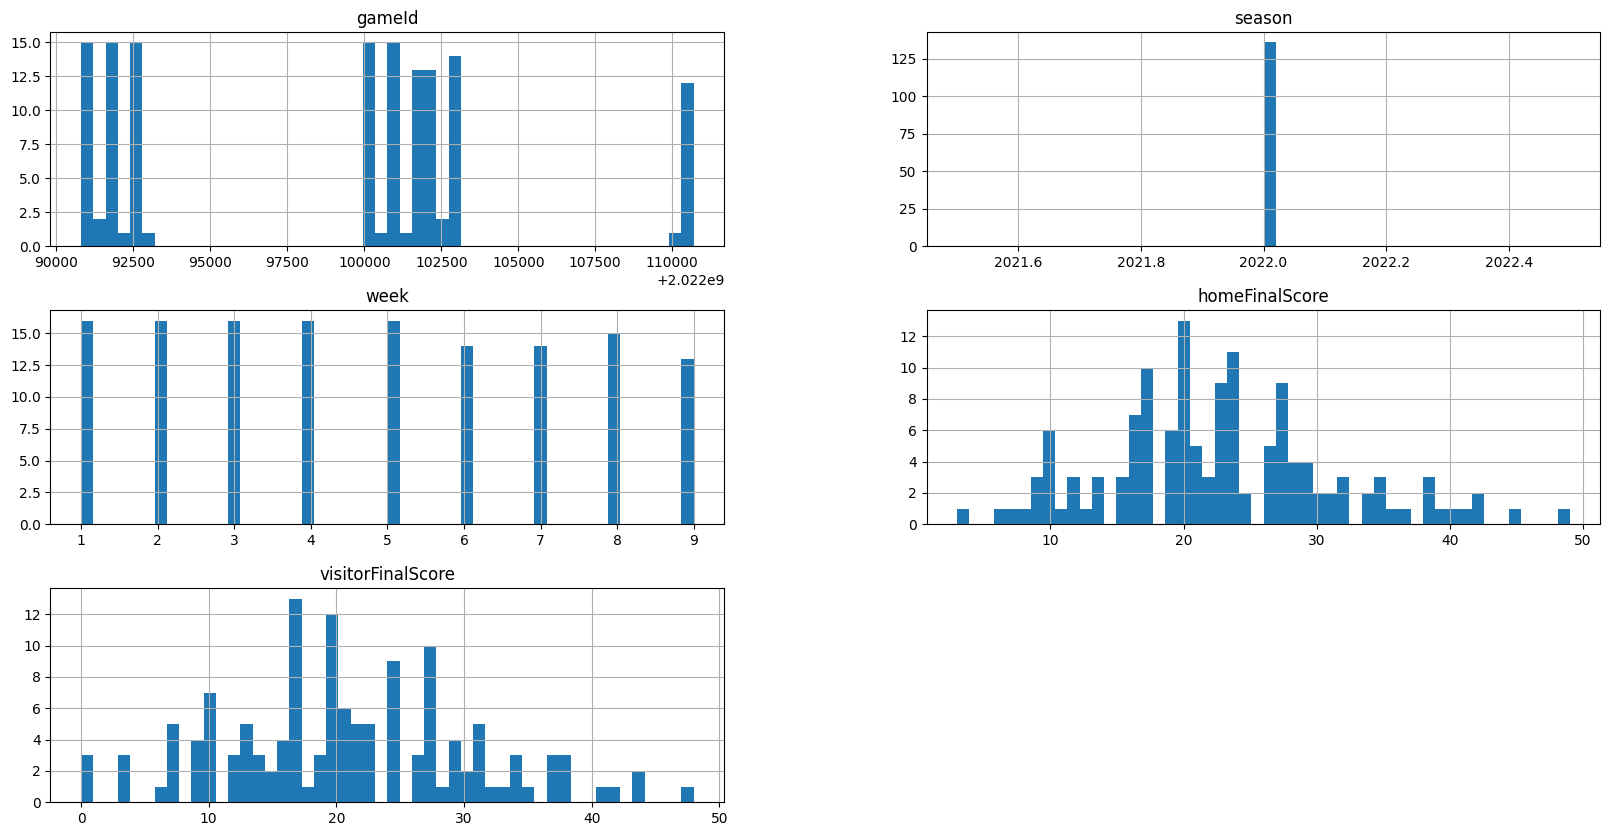

In [48]:
view_df(games_df)

The Raw Files Details Are: 

Top Five Values:

   nflId height  weight   birthDate     collegeName position     displayName
0  25511    6-4     225  1977-08-03        Michigan       QB       Tom Brady
1  29550    6-4     328  1982-01-22        Arkansas        T    Jason Peters
2  29851    6-2     225  1983-12-02      California       QB   Aaron Rodgers
3  30842    6-6     267  1984-05-19            UCLA       TE  Marcedes Lewis
4  33084    6-4     217  1985-05-17  Boston College       QB       Matt Ryan 

Datset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1683 non-null   int64 
 1   height       1683 non-null   object
 2   weight       1683 non-null   int64 
 3   birthDate    1204 non-null   object
 4   collegeName  1683 non-null   object
 5   position     1683 non-null   object
 6   displayName  1683 non-null  

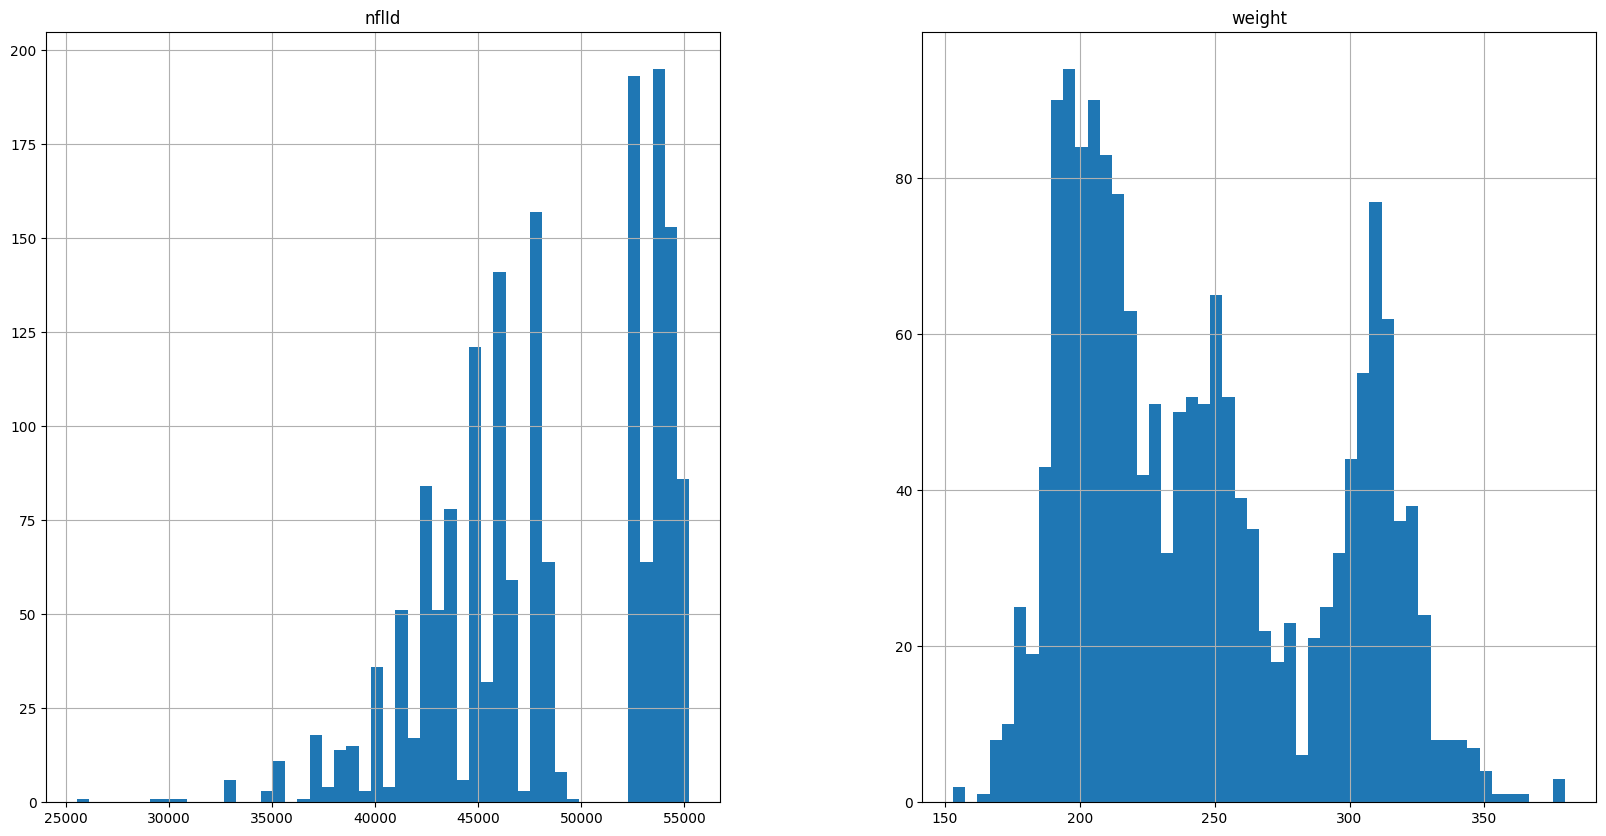

In [49]:
view_df(players_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId  ballCarrierId ballCarrierDisplayName  \
0  2022100908    3537          48723           Parker Hesse   
1  2022091103    3126          52457         Chase Claypool   
2  2022091111    1148          42547          Darren Waller   
3  2022100212    2007          46461             Mike Boone   
4  2022091900    1372          47857       Devin Singletary   

                                     playDescription  quarter  down  \
0  (7:52) (Shotgun) M.Mariota pass short middle t...        4     1   
1  (7:38) (Shotgun) C.Claypool right end to PIT 3...        4     1   
2  (8:57) D.Carr pass short middle to D.Waller to...        2     2   
3  (13:12) M.Boone left tackle to DEN 44 for 7 ya...        3     2   
4  (8:33) D.Singletary right guard to TEN 32 for ...        2     1   

   yardsToGo possessionTeam defensiveTeam  ... preSnapHomeTeamWinProbability  \
0         10            ATL            TB  ...                     

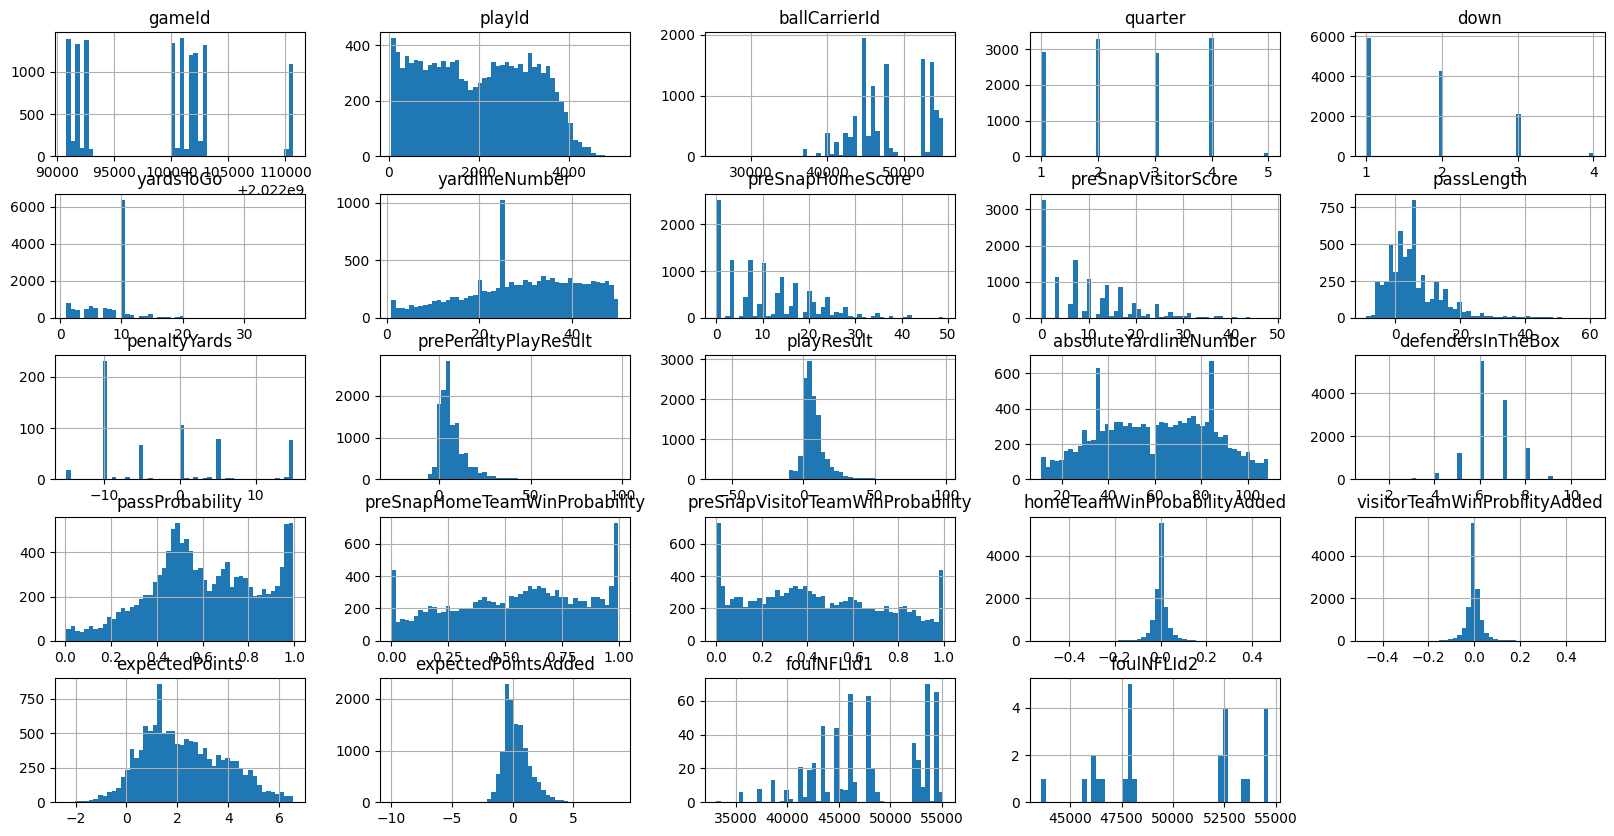

In [50]:
view_df(plays_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId  nflId  tackle  assist  forcedFumble  pff_missedTackle
0  2022090800     101  42816       1       0             0                 0
1  2022090800     393  46232       1       0             0                 0
2  2022090800     486  40166       1       0             0                 0
3  2022090800     646  47939       1       0             0                 0
4  2022090800     818  40107       1       0             0                 0 

Datset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17426 entries, 0 to 17425
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gameId            17426 non-null  int64
 1   playId            17426 non-null  int64
 2   nflId             17426 non-null  int64
 3   tackle            17426 non-null  int64
 4   assist            17426 non-null  int64
 5   forcedFumble      17426 non-null  int64

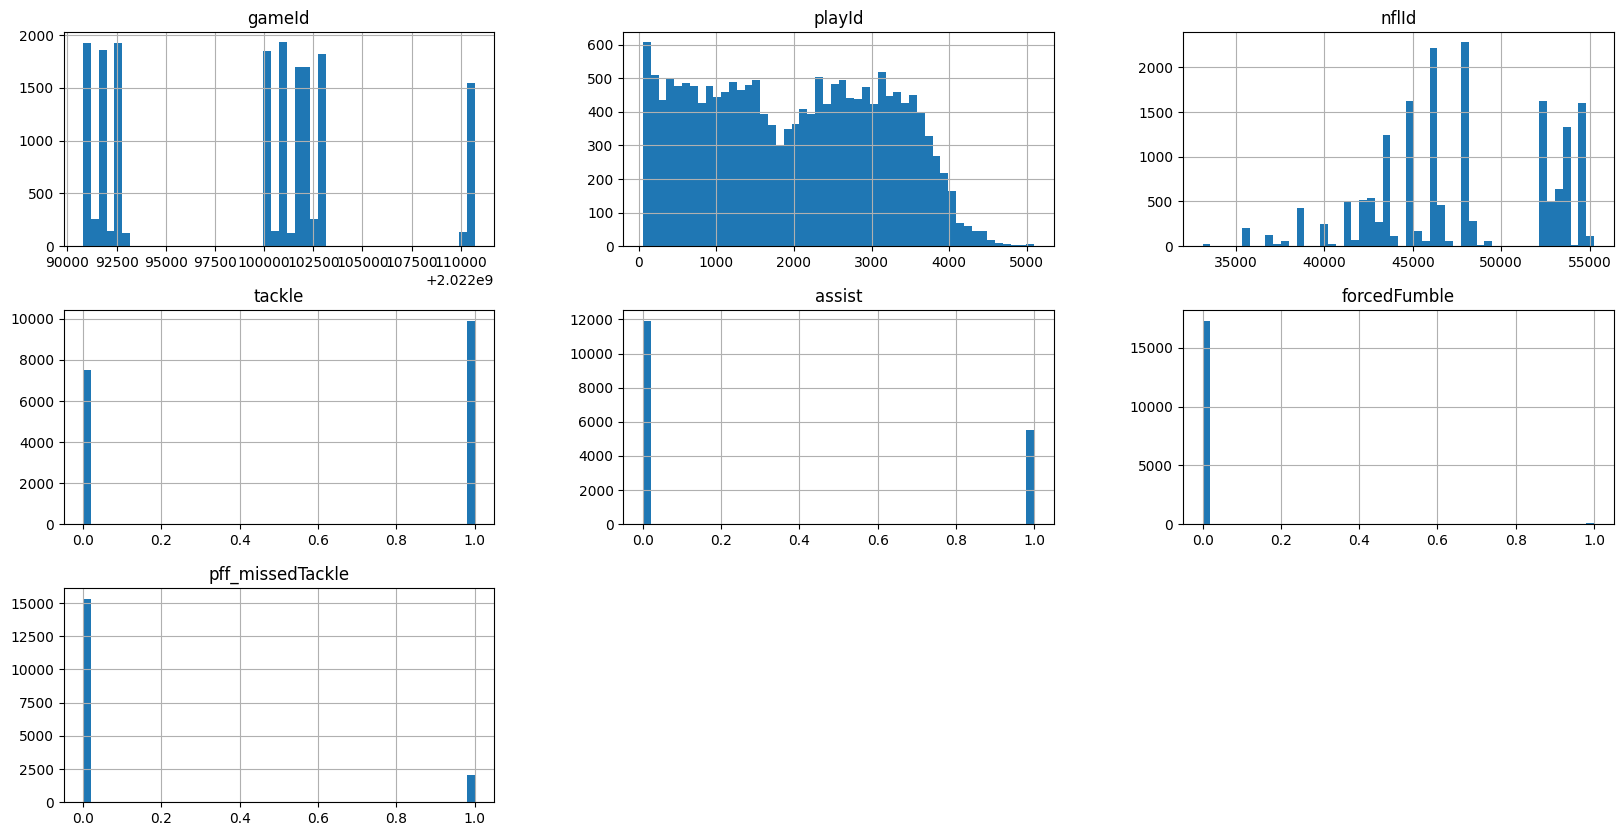

In [54]:
view_df(tackles_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId    nflId     displayName  frameId  \
0  2022090800      56  35472.0  Rodger Saffold        1   
1  2022090800      56  35472.0  Rodger Saffold        2   
2  2022090800      56  35472.0  Rodger Saffold        3   
3  2022090800      56  35472.0  Rodger Saffold        4   
4  2022090800      56  35472.0  Rodger Saffold        5   

                         time  jerseyNumber club playDirection      x      y  \
0  2022-09-08 20:24:05.200000          76.0  BUF          left  88.37  27.27   
1  2022-09-08 20:24:05.299999          76.0  BUF          left  88.47  27.13   
2  2022-09-08 20:24:05.400000          76.0  BUF          left  88.56  27.01   
3  2022-09-08 20:24:05.500000          76.0  BUF          left  88.64  26.90   
4  2022-09-08 20:24:05.599999          76.0  BUF          left  88.72  26.80   

      s     a   dis       o     dir         event  
0  1.62  1.15  0.16  231.74  147.90           NaN  
1  1.67  0.61

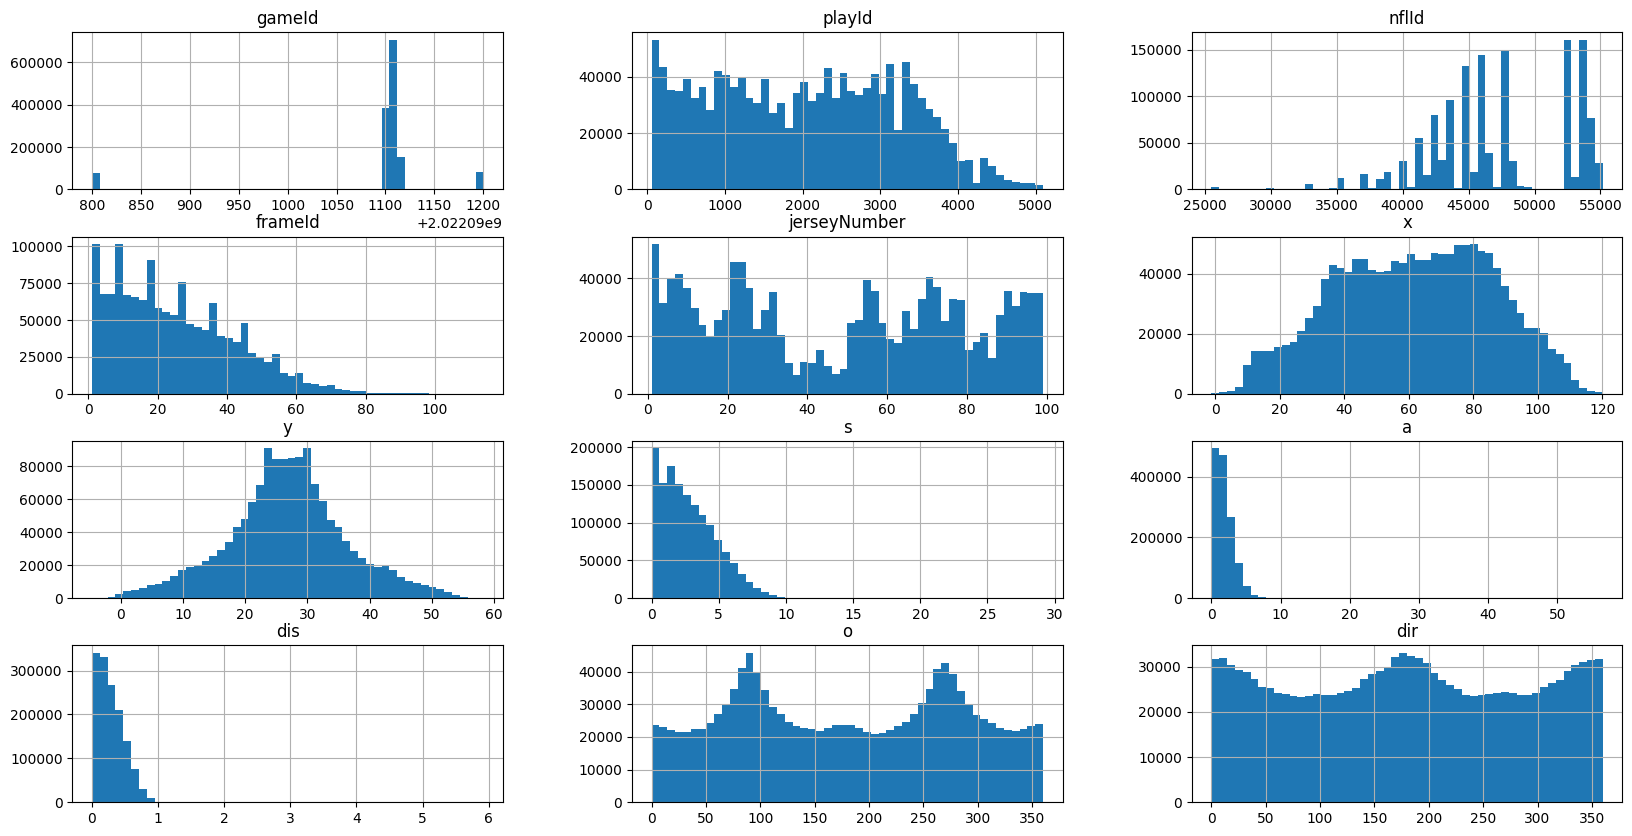

In [55]:
view_df(tracking1_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId    nflId   displayName  frameId  \
0  2022091500      55  40011.0  Travis Kelce        1   
1  2022091500      55  40011.0  Travis Kelce        2   
2  2022091500      55  40011.0  Travis Kelce        3   
3  2022091500      55  40011.0  Travis Kelce        4   
4  2022091500      55  40011.0  Travis Kelce        5   

                         time  jerseyNumber club playDirection     x     y  \
0  2022-09-15 20:16:32.700000          87.0   KC          left  87.2  24.9   
1  2022-09-15 20:16:32.799999          87.0   KC          left  87.2  24.9   
2  2022-09-15 20:16:32.900000          87.0   KC          left  87.2  24.9   
3  2022-09-15 20:16:33.000000          87.0   KC          left  87.2  24.9   
4  2022-09-15 20:16:33.099999          87.0   KC          left  87.2  24.9   

      s     a  dis       o     dir event  
0  0.00  0.00  0.0  263.11  138.55   NaN  
1  0.00  0.00  0.0  263.11  142.54   NaN  
2  0.00  0.0

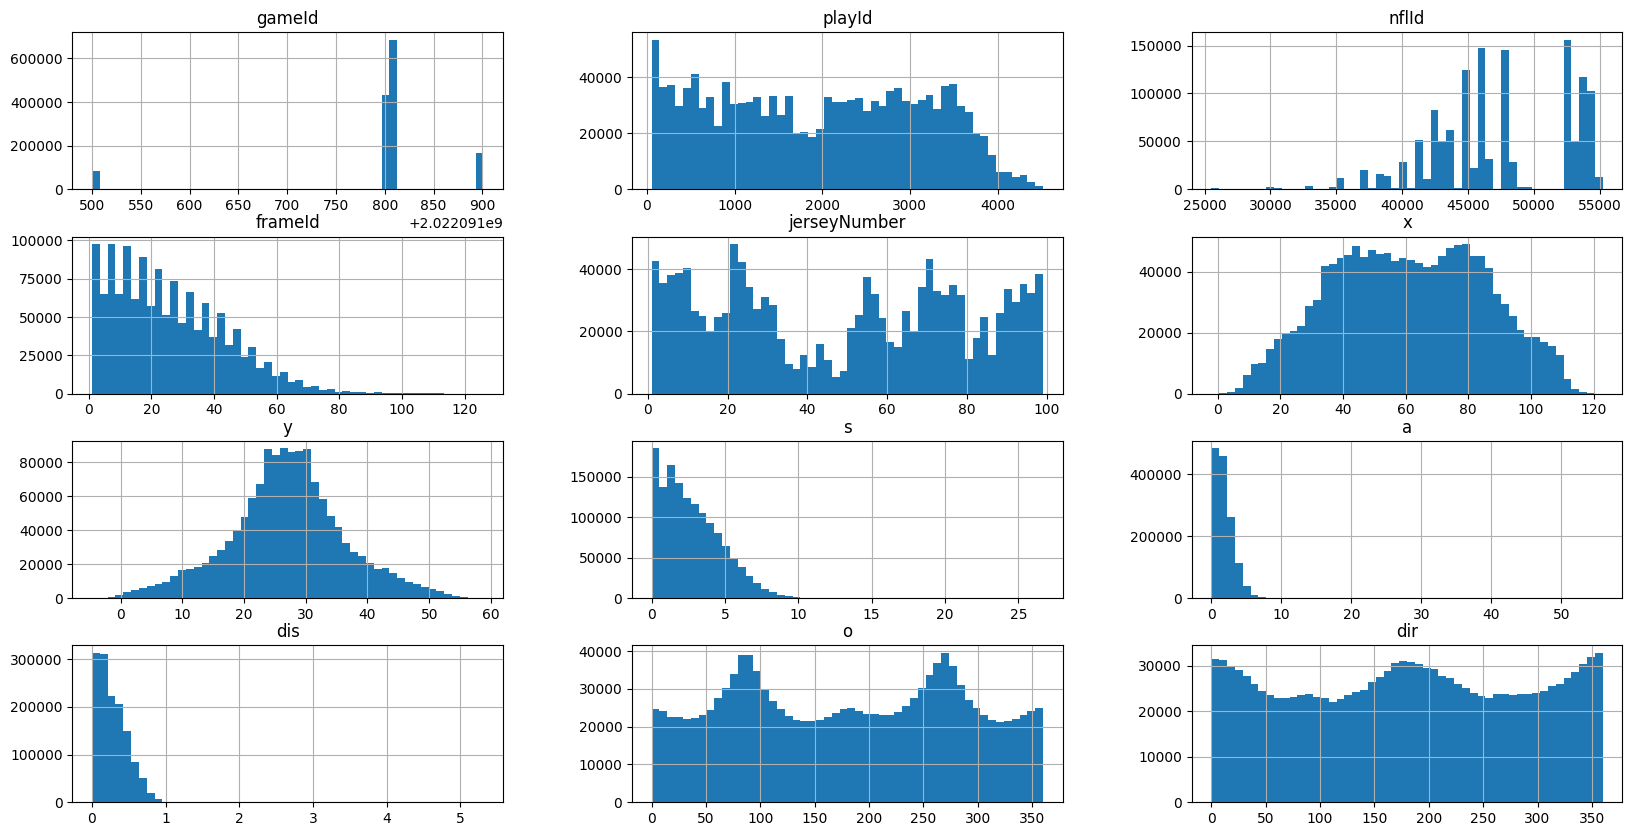

In [56]:
view_df(tracking2_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId    nflId   displayName  frameId  \
0  2022092200      56  35449.0  Tyson Alualu        1   
1  2022092200      56  35449.0  Tyson Alualu        2   
2  2022092200      56  35449.0  Tyson Alualu        3   
3  2022092200      56  35449.0  Tyson Alualu        4   
4  2022092200      56  35449.0  Tyson Alualu        5   

                         time  jerseyNumber club playDirection     x      y  \
0  2022-09-22 20:16:26.500000          94.0  PIT          left  84.1  23.83   
1  2022-09-22 20:16:26.599999          94.0  PIT          left  84.1  23.83   
2  2022-09-22 20:16:26.700000          94.0  PIT          left  84.1  23.83   
3  2022-09-22 20:16:26.799999          94.0  PIT          left  84.1  23.83   
4  2022-09-22 20:16:26.900000          94.0  PIT          left  84.1  23.83   

     s    a   dis      o     dir event  
0  0.0  0.0  0.00  97.54  272.43   NaN  
1  0.0  0.0  0.00  97.54  269.87   NaN  
2  0.0  0.0 

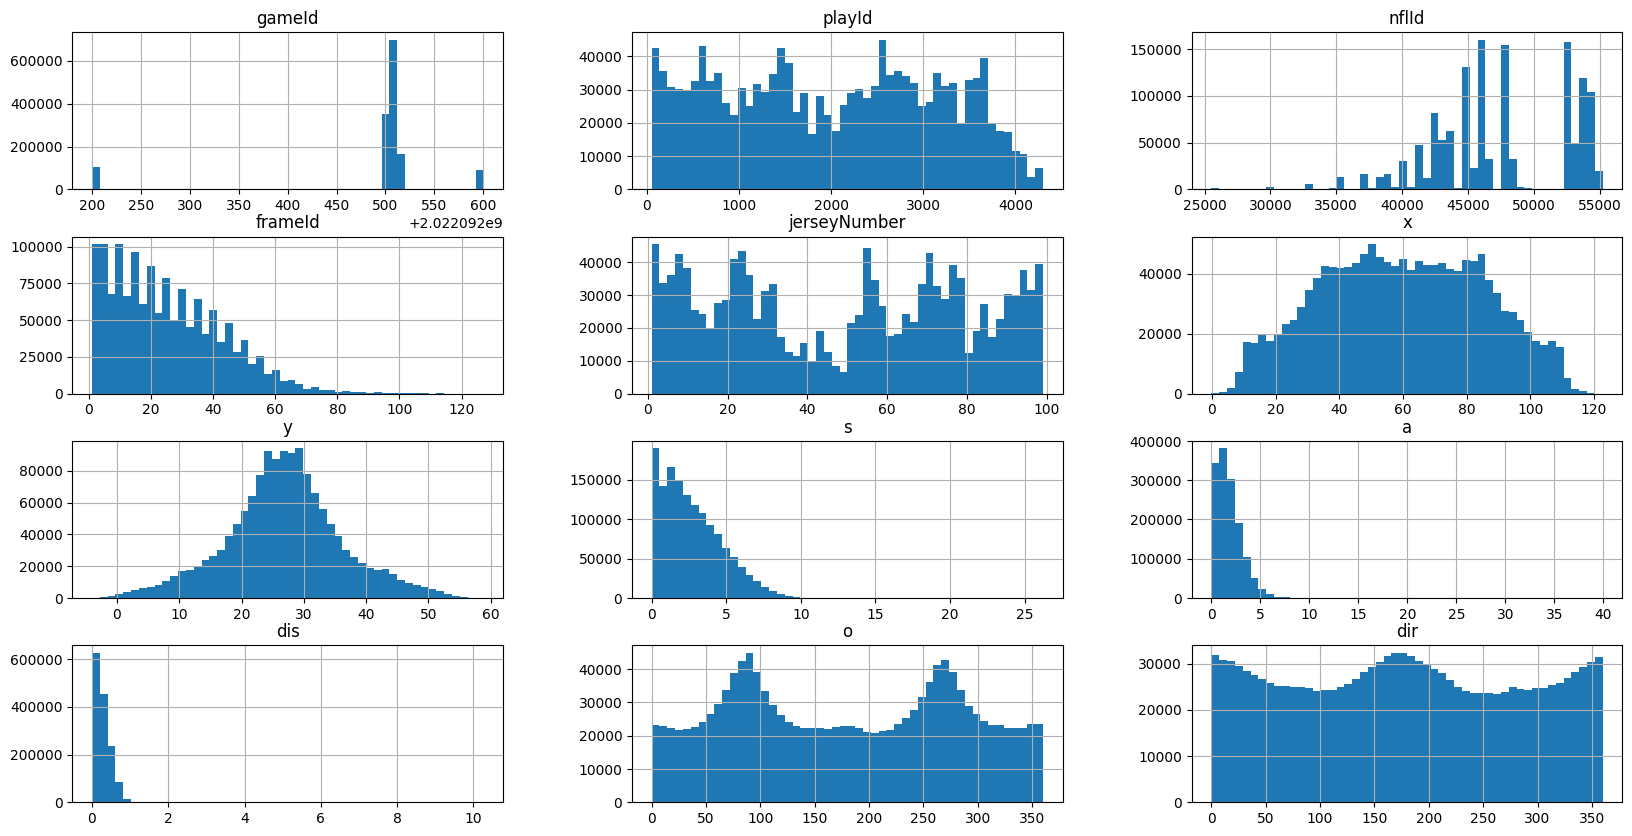

In [63]:
view_df(tracking3_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId    nflId    displayName  frameId  \
0  2022092900      57  42654.0  La'el Collins        1   
1  2022092900      57  42654.0  La'el Collins        2   
2  2022092900      57  42654.0  La'el Collins        3   
3  2022092900      57  42654.0  La'el Collins        4   
4  2022092900      57  42654.0  La'el Collins        5   

                         time  jerseyNumber club playDirection      x      y  \
0  2022-09-29 20:16:00.099999          71.0  CIN          left  86.21  30.88   
1  2022-09-29 20:16:00.200000          71.0  CIN          left  86.21  30.88   
2  2022-09-29 20:16:00.299999          71.0  CIN          left  86.21  30.87   
3  2022-09-29 20:16:00.400000          71.0  CIN          left  86.21  30.86   
4  2022-09-29 20:16:00.500000          71.0  CIN          left  86.21  30.85   

      s     a   dis       o     dir event  
0  0.00  0.00  0.00  262.60  246.29   NaN  
1  0.00  0.00  0.00  263.32  234.76

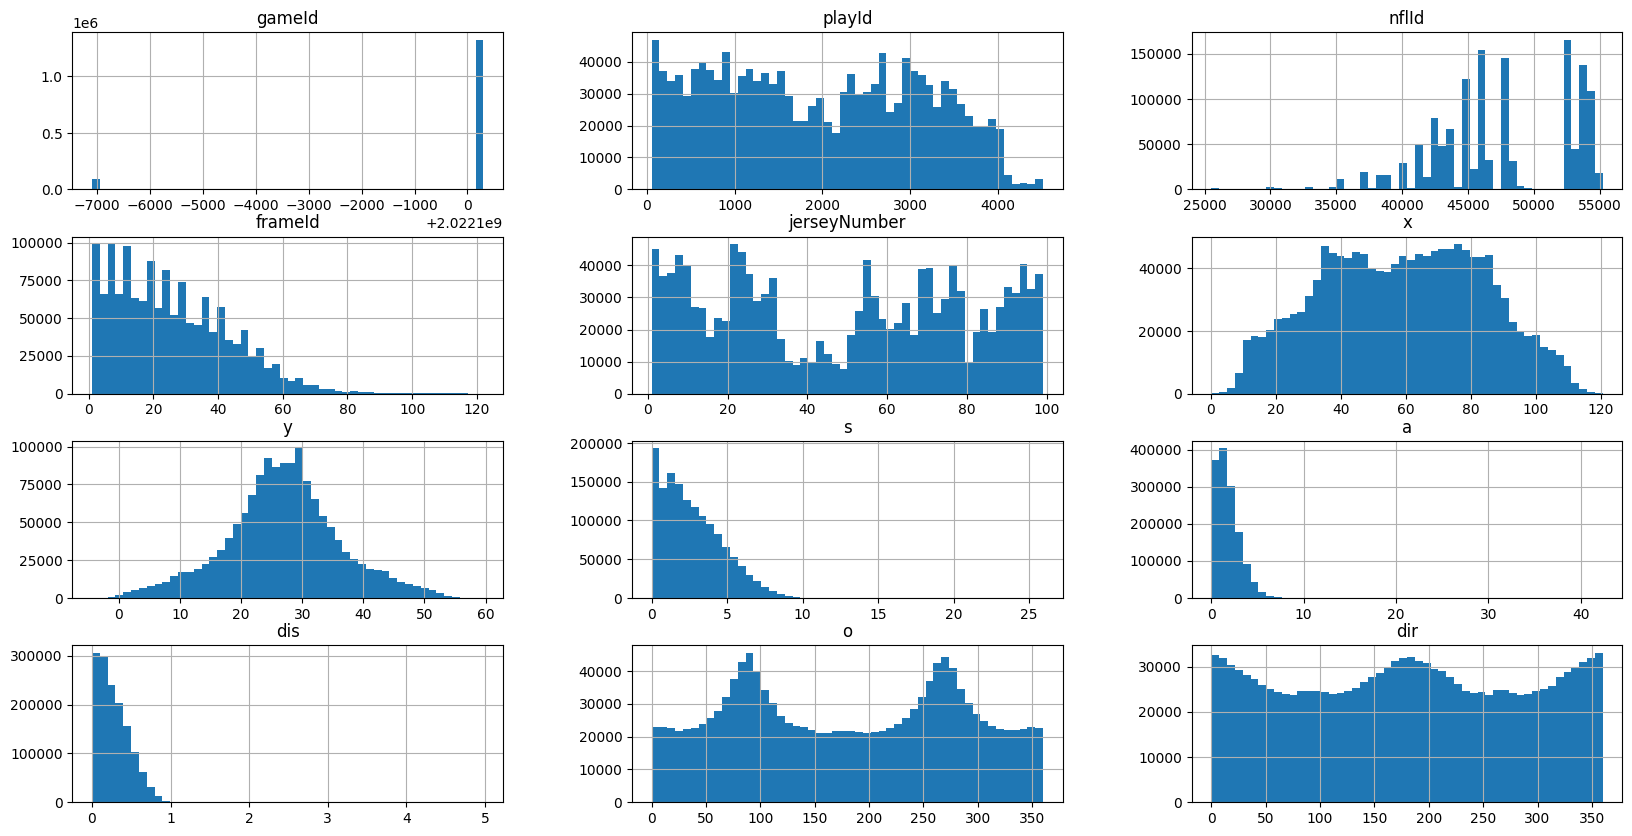

In [62]:
view_df(tracking4_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId    nflId displayName  frameId  \
0  2022100600      90  33084.0   Matt Ryan        1   
1  2022100600      90  33084.0   Matt Ryan        2   
2  2022100600      90  33084.0   Matt Ryan        3   
3  2022100600      90  33084.0   Matt Ryan        4   
4  2022100600      90  33084.0   Matt Ryan        5   

                         time  jerseyNumber club playDirection      x      y  \
0  2022-10-06 20:17:04.799999           2.0  IND          left  90.42  23.74   
1  2022-10-06 20:17:04.900000           2.0  IND          left  90.39  23.74   
2  2022-10-06 20:17:05.000000           2.0  IND          left  90.36  23.73   
3  2022-10-06 20:17:05.099999           2.0  IND          left  90.32  23.73   
4  2022-10-06 20:17:05.200000           2.0  IND          left  90.28  23.72   

      s     a   dis       o     dir event  
0  0.11  0.04  0.03  271.98  257.76   NaN  
1  0.14  0.06  0.03  272.84  256.68   NaN  
2  0.17  

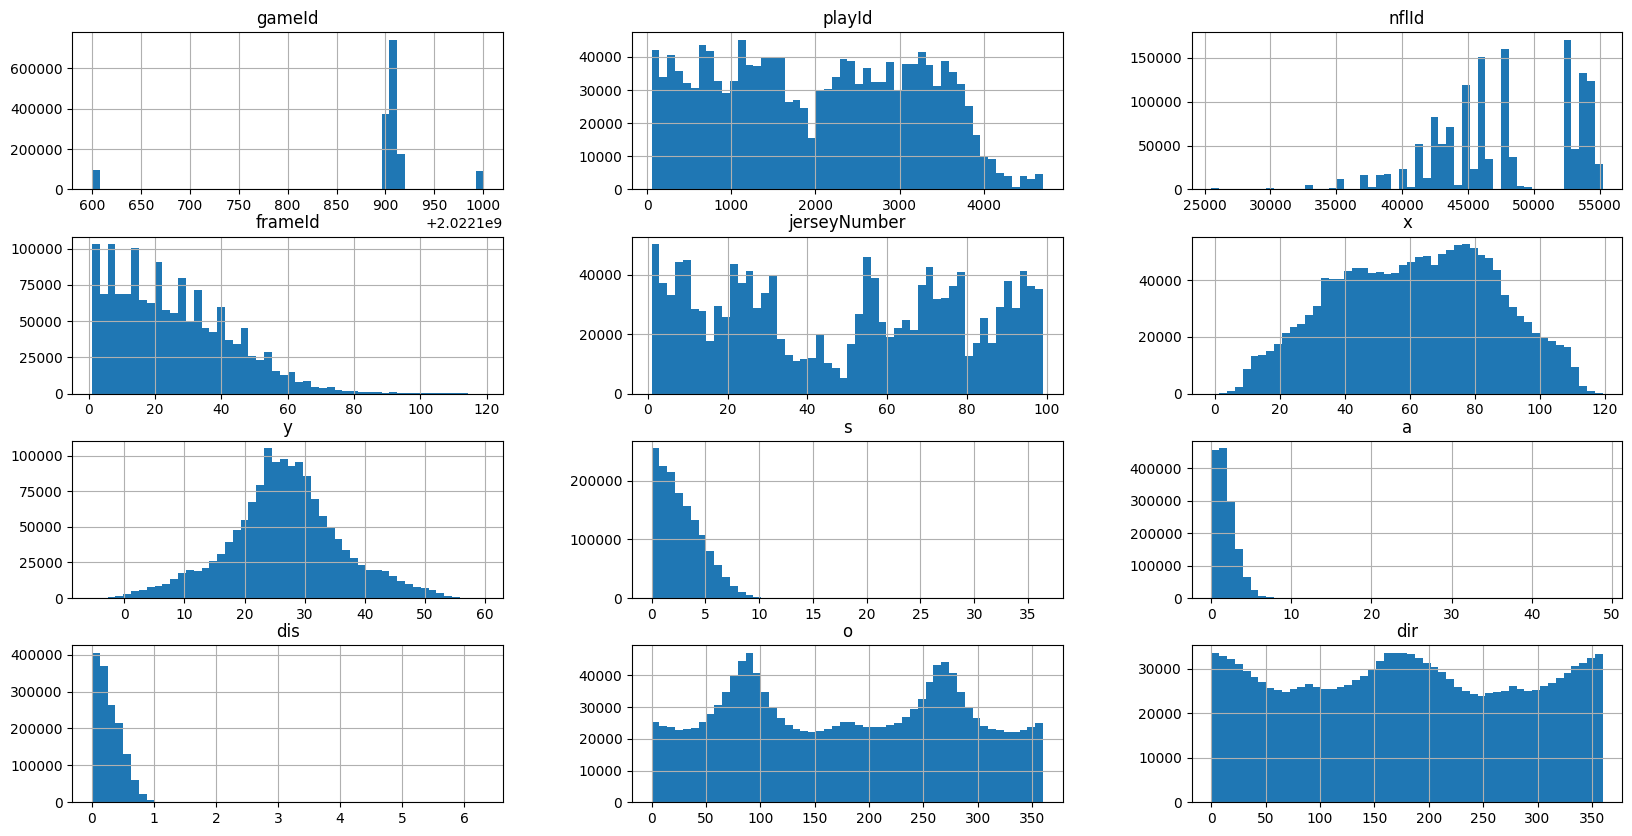

In [61]:
view_df(tracking5_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId    nflId   displayName  frameId  \
0  2022101300      54  42488.0  Bobby McCain        1   
1  2022101300      54  42488.0  Bobby McCain        2   
2  2022101300      54  42488.0  Bobby McCain        3   
3  2022101300      54  42488.0  Bobby McCain        4   
4  2022101300      54  42488.0  Bobby McCain        5   

                         time  jerseyNumber club playDirection      x      y  \
0  2022-10-13 20:16:18.799999          20.0  WAS          left  68.86  37.60   
1  2022-10-13 20:16:18.900000          20.0  WAS          left  68.48  37.47   
2  2022-10-13 20:16:19.000000          20.0  WAS          left  68.10  37.31   
3  2022-10-13 20:16:19.099999          20.0  WAS          left  67.73  37.11   
4  2022-10-13 20:16:19.200000          20.0  WAS          left  67.37  36.88   

      s     a   dis       o     dir event  
0  3.95  2.63  0.39  175.81  254.51   NaN  
1  4.07  2.75  0.40  180.36  249.50   NaN

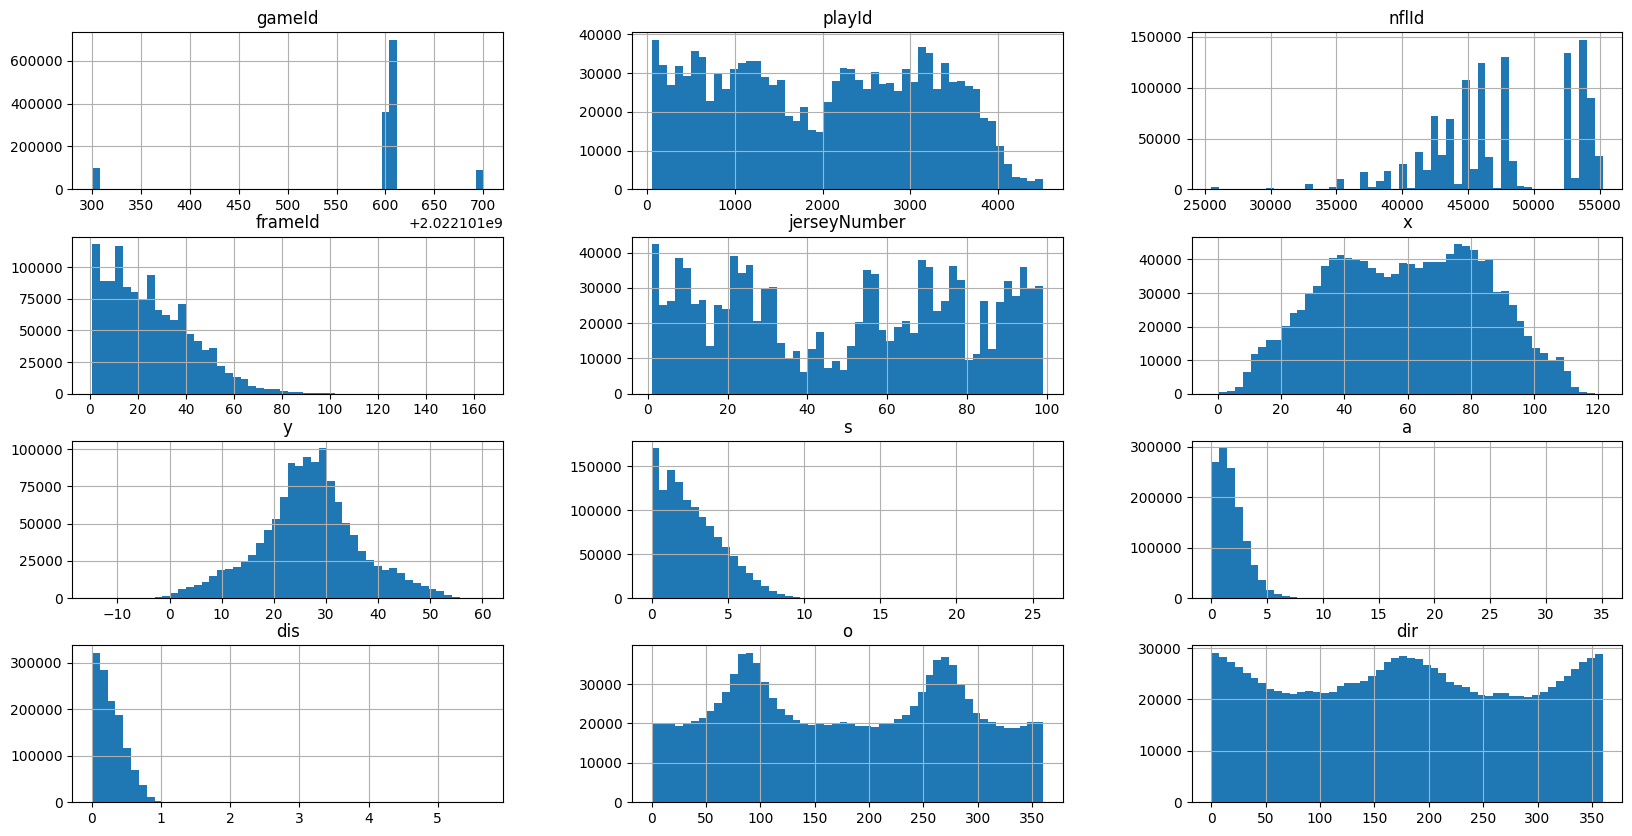

In [60]:
view_df(tracking6_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId    nflId displayName  frameId  \
0  2022102000      56  37084.0   J.J. Watt        1   
1  2022102000      56  37084.0   J.J. Watt        2   
2  2022102000      56  37084.0   J.J. Watt        3   
3  2022102000      56  37084.0   J.J. Watt        4   
4  2022102000      56  37084.0   J.J. Watt        5   

                         time  jerseyNumber club playDirection      x      y  \
0  2022-10-20 20:16:19.099999          99.0  ARI          left  87.64  23.49   
1  2022-10-20 20:16:19.200000          99.0  ARI          left  88.02  23.63   
2  2022-10-20 20:16:19.299999          99.0  ARI          left  88.44  23.74   
3  2022-10-20 20:16:19.400000          99.0  ARI          left  88.86  23.82   
4  2022-10-20 20:16:19.500000          99.0  ARI          left  89.28  23.88   

      s     a   dis       o    dir         event  
0  3.95  2.68  0.40  113.01  67.50           NaN  
1  4.08  2.35  0.41  118.70  71.05  pas

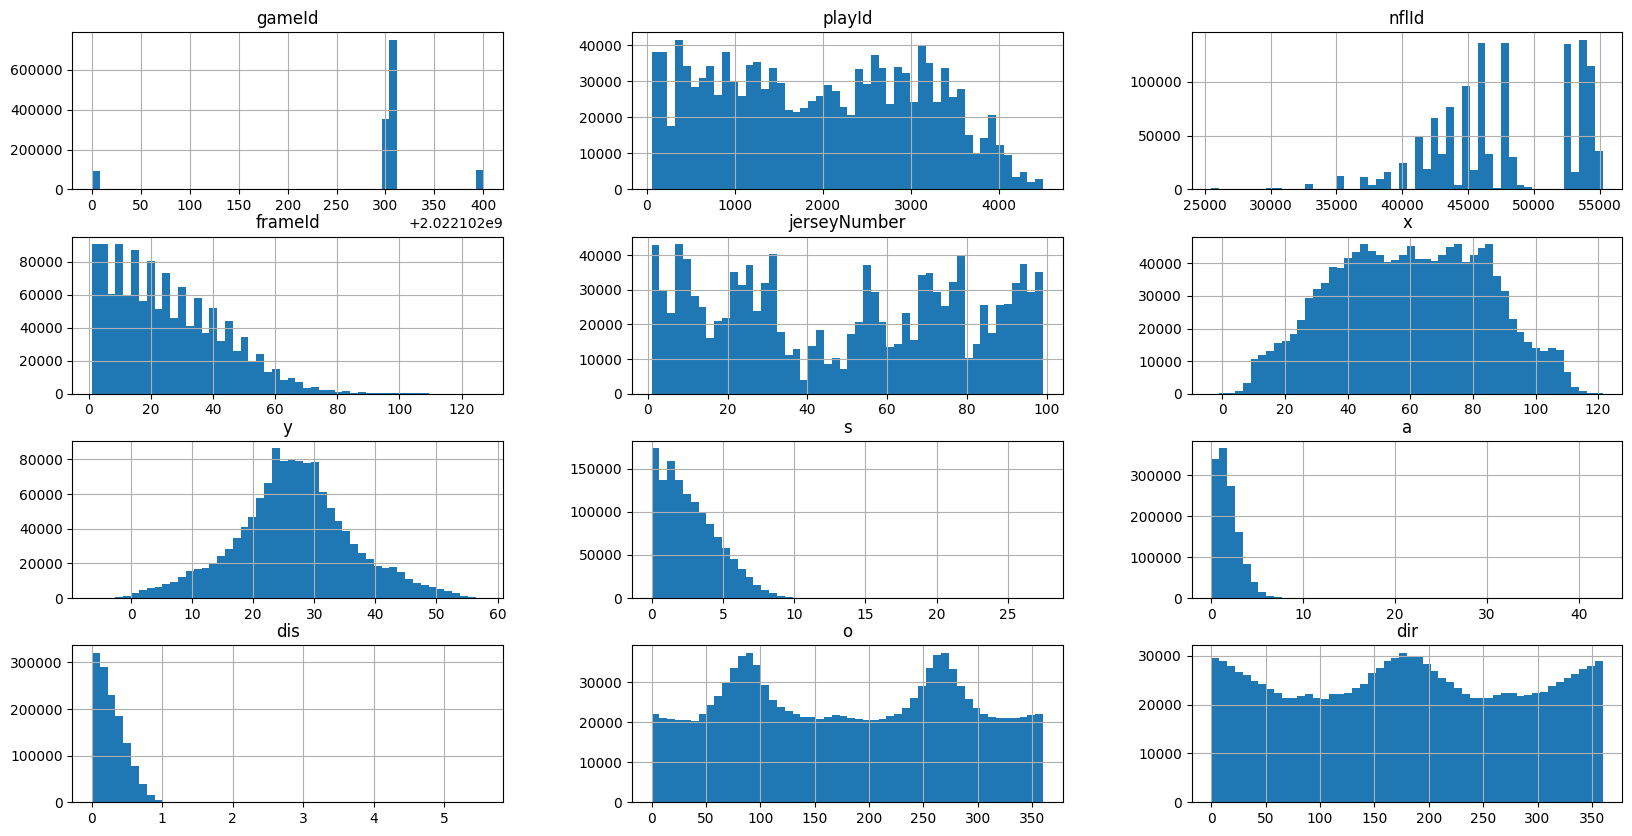

In [59]:
view_df(tracking7_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId    nflId    displayName  frameId  \
0  2022102700      68  38557.0  Kevin Zeitler        1   
1  2022102700      68  38557.0  Kevin Zeitler        2   
2  2022102700      68  38557.0  Kevin Zeitler        3   
3  2022102700      68  38557.0  Kevin Zeitler        4   
4  2022102700      68  38557.0  Kevin Zeitler        5   

                         time  jerseyNumber club playDirection      x      y  \
0  2022-10-27 20:16:37.099999          70.0  BAL         right  25.82  28.56   
1  2022-10-27 20:16:37.200000          70.0  BAL         right  25.78  28.64   
2  2022-10-27 20:16:37.299999          70.0  BAL         right  25.77  28.72   
3  2022-10-27 20:16:37.400000          70.0  BAL         right  25.77  28.79   
4  2022-10-27 20:16:37.500000          70.0  BAL         right  25.79  28.86   

      s     a   dis      o     dir         event  
0  0.92  1.22  0.10  62.16  327.70           NaN  
1  0.87  1.12  0.09  

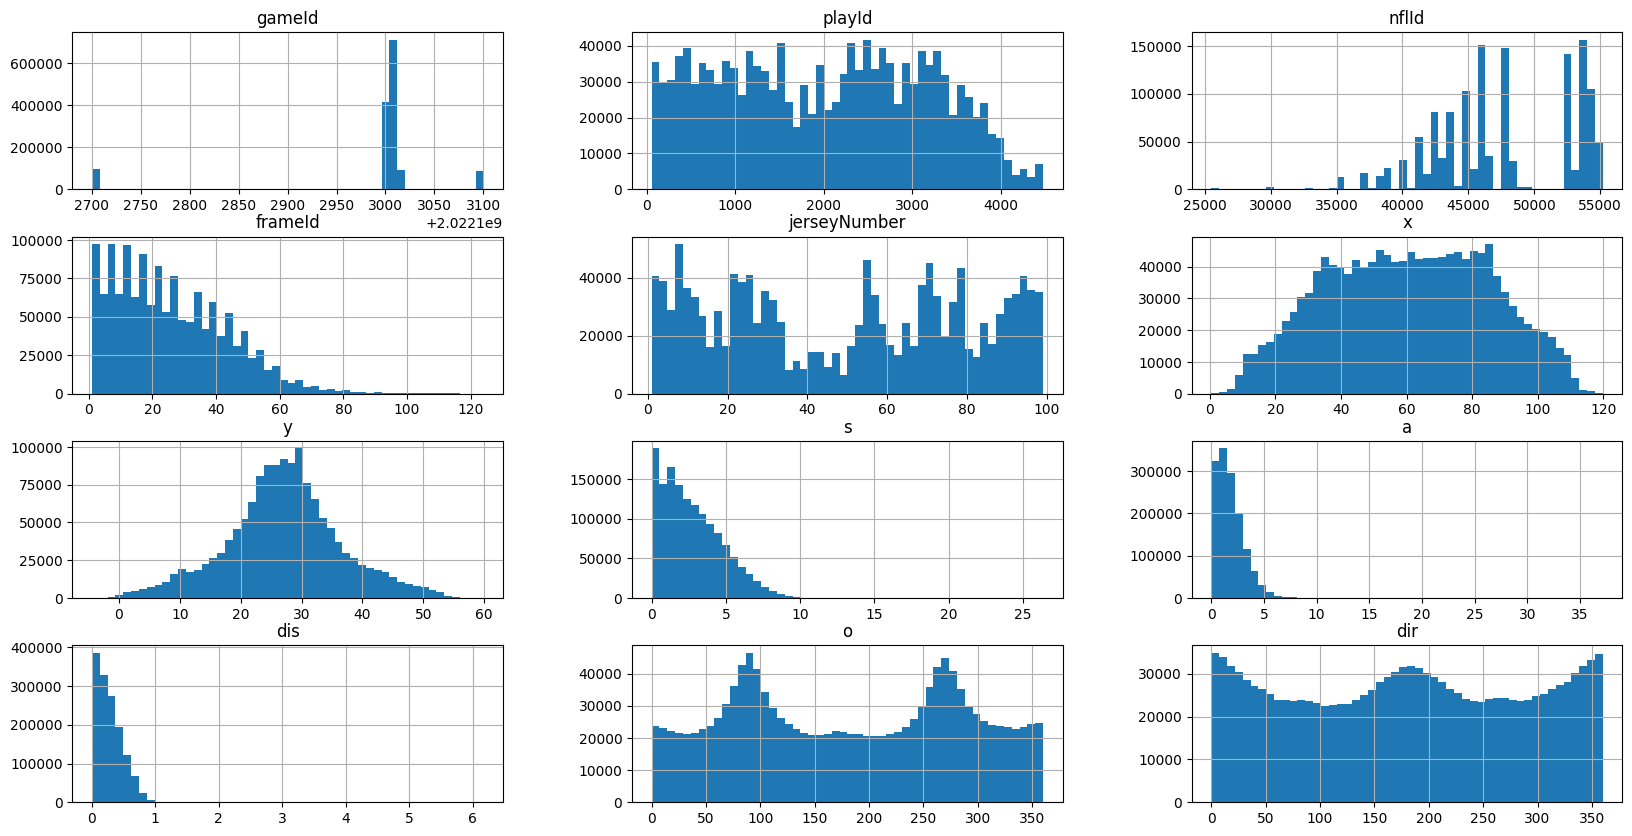

In [58]:
view_df(tracking8_df)

The Raw Files Details Are: 

Top Five Values:

       gameId  playId    nflId   displayName  frameId  \
0  2022110300      55  38542.0  Fletcher Cox        1   
1  2022110300      55  38542.0  Fletcher Cox        2   
2  2022110300      55  38542.0  Fletcher Cox        3   
3  2022110300      55  38542.0  Fletcher Cox        4   
4  2022110300      55  38542.0  Fletcher Cox        5   

                         time  jerseyNumber club playDirection      x      y  \
0  2022-11-03 20:16:30.400000          91.0  PHI         right  35.31  21.25   
1  2022-11-03 20:16:30.500000          91.0  PHI         right  35.30  21.25   
2  2022-11-03 20:16:30.599999          91.0  PHI         right  35.29  21.25   
3  2022-11-03 20:16:30.700000          91.0  PHI         right  35.31  21.24   
4  2022-11-03 20:16:30.799999          91.0  PHI         right  35.31  21.25   

      s     a   dis       o     dir event  
0  0.25  0.21  0.01  275.05  263.18   NaN  
1  0.21  0.20  0.02  270.08  264.09   NaN

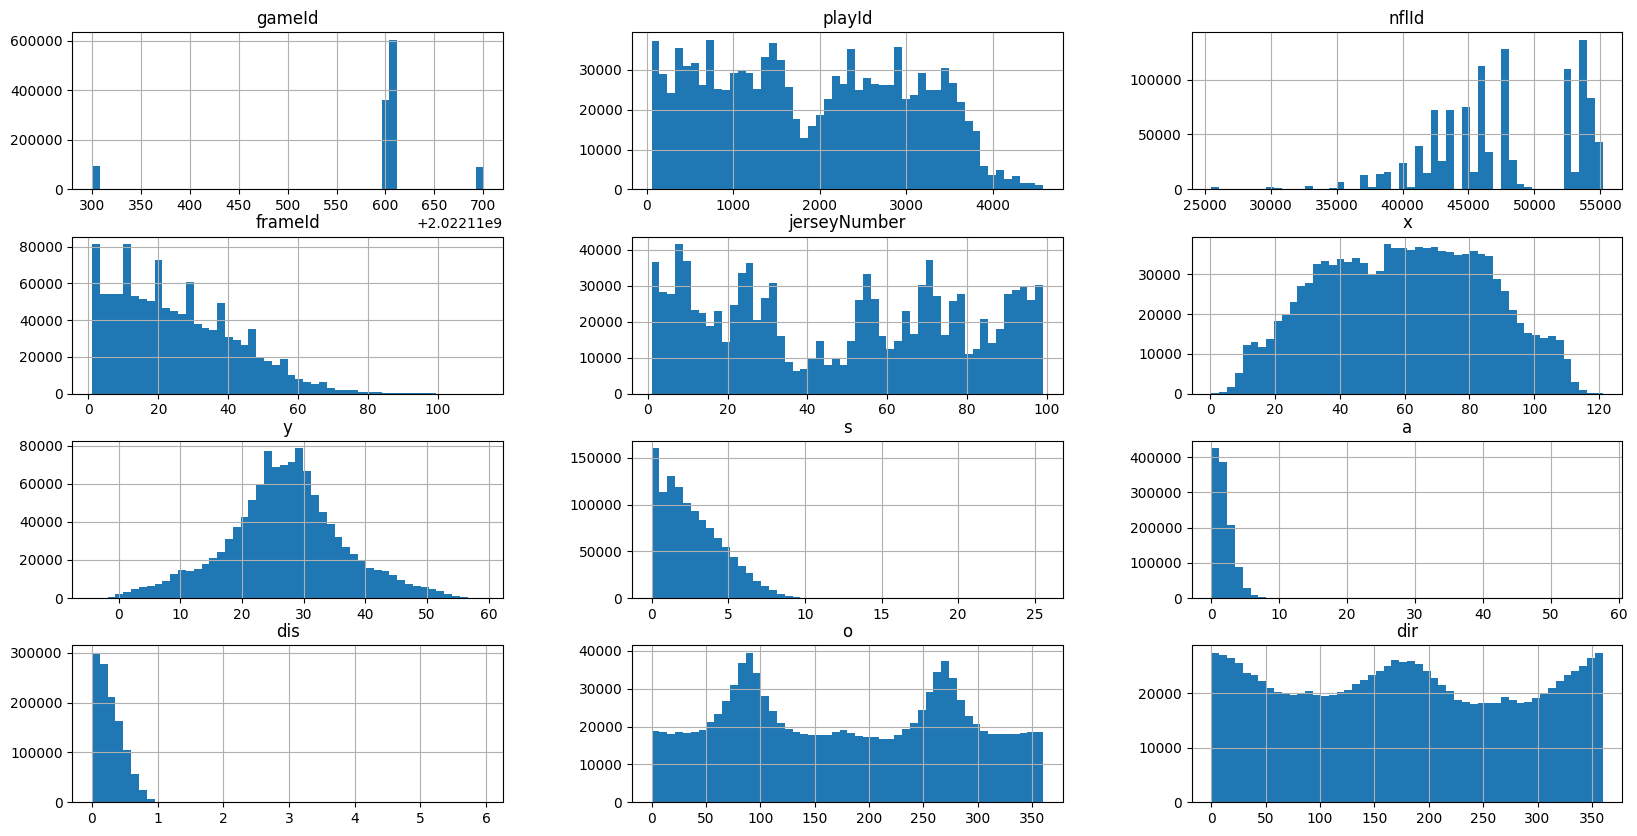

In [57]:
view_df(tracking9_df)

In [86]:
# combining tracking dataset in one complete dataset
tracking_df = pd.concat([tracking1_df, tracking2_df, tracking3_df, tracking4_df, tracking5_df, tracking6_df, tracking7_df, tracking8_df, tracking9_df,])

In [84]:
tracking1_df.tail(80)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1407359,2022091200,3826,54618.0,Tariq Woolen,27,2022-09-12 23:05:55.599999,27.0,SEA,left,47.850000,11.63,4.56,1.71,0.46,162.70,191.45,NaN
1407360,2022091200,3826,54618.0,Tariq Woolen,28,2022-09-12 23:05:55.700000,27.0,SEA,left,47.770000,11.18,4.41,1.93,0.45,156.30,189.49,NaN
1407361,2022091200,3826,54618.0,Tariq Woolen,29,2022-09-12 23:05:55.799999,27.0,SEA,left,47.710000,10.76,4.23,2.15,0.43,149.34,186.98,NaN
1407362,2022091200,3826,54618.0,Tariq Woolen,30,2022-09-12 23:05:55.900000,27.0,SEA,left,47.670000,10.35,4.04,2.39,0.41,143.91,183.82,NaN
1407363,2022091200,3826,54618.0,Tariq Woolen,31,2022-09-12 23:05:56.000000,27.0,SEA,left,47.670000,9.95,3.90,2.76,0.40,137.54,178.71,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,NaN,football,49,2022-09-12 23:05:57.799999,NaN,football,left,56.220001,9.89,2.56,1.25,0.25,NaN,NaN,tackle
1407435,2022091200,3826,NaN,football,50,2022-09-12 23:05:57.900000,NaN,football,left,56.060001,10.08,2.50,1.14,0.24,NaN,NaN,NaN
1407436,2022091200,3826,NaN,football,51,2022-09-12 23:05:58.000000,NaN,football,left,55.889999,10.27,2.38,1.70,0.25,NaN,NaN,NaN
1407437,2022091200,3826,NaN,football,52,2022-09-12 23:05:58.099999,NaN,football,left,55.730000,10.44,2.07,2.83,0.24,NaN,NaN,NaN


In [76]:
tracking_df

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150018,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle
1150019,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN
1150020,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN
1150021,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN


The Raw Files Details Are: 

Top Five Values:

       gameId  playId    nflId     displayName  frameId  \
0  2022090800      56  35472.0  Rodger Saffold        1   
1  2022090800      56  35472.0  Rodger Saffold        2   
2  2022090800      56  35472.0  Rodger Saffold        3   
3  2022090800      56  35472.0  Rodger Saffold        4   
4  2022090800      56  35472.0  Rodger Saffold        5   

                         time  jerseyNumber club playDirection      x      y  \
0  2022-09-08 20:24:05.200000          76.0  BUF          left  88.37  27.27   
1  2022-09-08 20:24:05.299999          76.0  BUF          left  88.47  27.13   
2  2022-09-08 20:24:05.400000          76.0  BUF          left  88.56  27.01   
3  2022-09-08 20:24:05.500000          76.0  BUF          left  88.64  26.90   
4  2022-09-08 20:24:05.599999          76.0  BUF          left  88.72  26.80   

      s     a   dis       o     dir         event  
0  1.62  1.15  0.16  231.74  147.90           NaN  
1  1.67  0.61

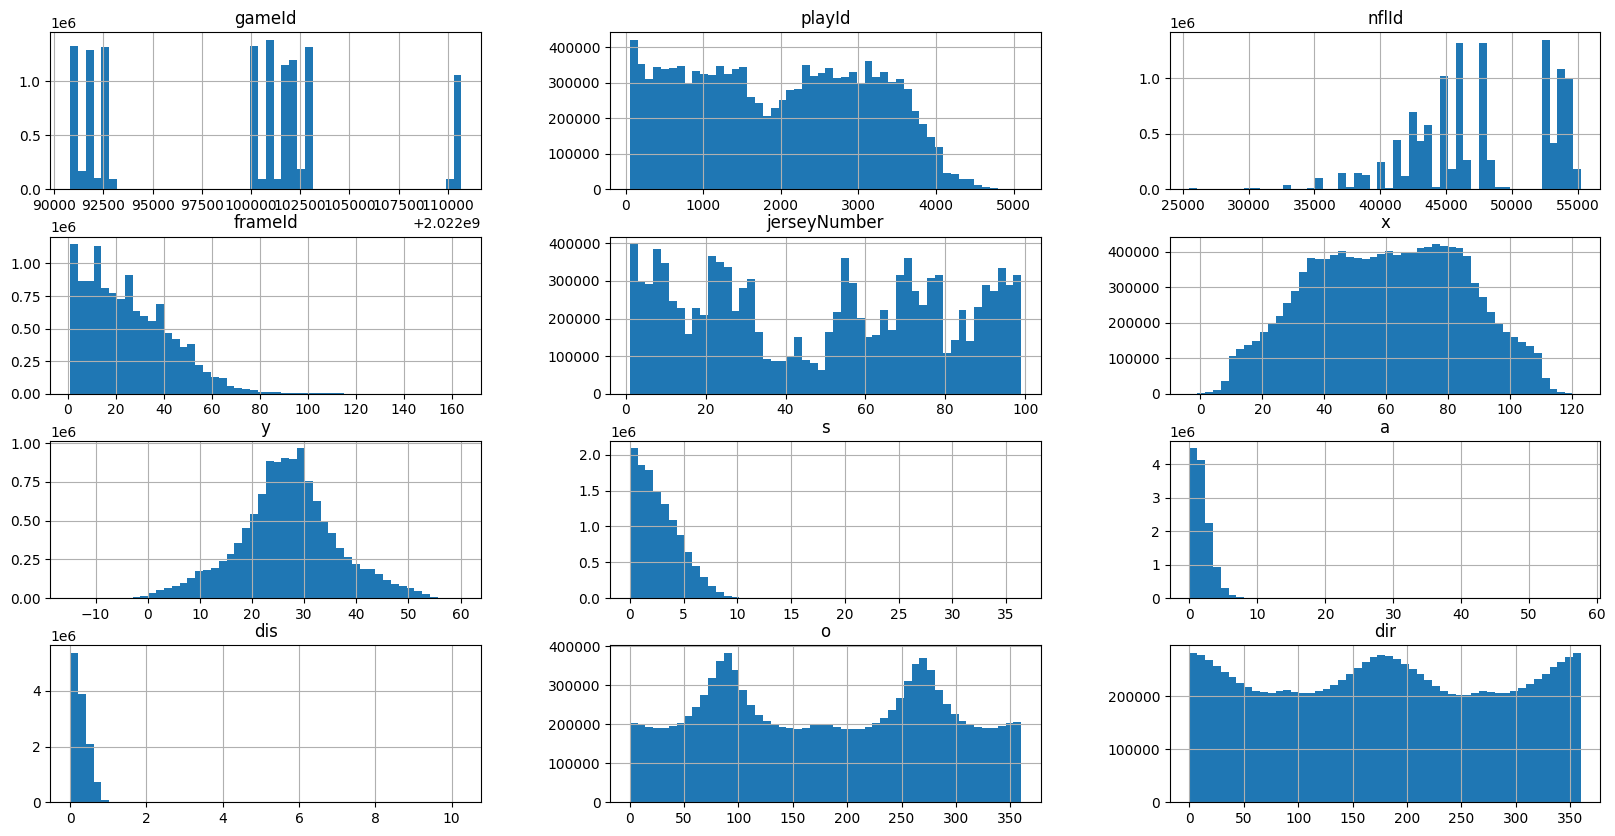

In [85]:
view_df(tracking_df)